Train data:
[[ 36.   0. 200. ...   0.   1.   0.]
 [ 56.  20. 246. ...   0.   0.   1.]
 [ 55.  20. 249. ...   0.   0.   1.]
 ...
 [ 39.   0. 243. ...   0.   1.   0.]
 [ 46.   0. 254. ...   0.   1.   0.]
 [ 39.  40. 207. ...   1.   0.   1.]]
[[124.5  92.5]
 [202.  124. ]
 [133.   88. ]
 ...
 [152.   98. ]
 [123.   75. ]
 [158.   70. ]]
Test data:
[[ 42.  18. 219. ...   0.   0.   1.]
 [ 46.   0. 295. ...   0.   1.   0.]
 [ 50.   0. 312. ...   0.   1.   0.]
 ...
 [ 66.  30. 234. ...   1.   0.   1.]
 [ 53.   0. 303. ...   0.   1.   0.]
 [ 46.  20. 210. ...   1.   0.   1.]]
[[114.   77. ]
 [167.5  91.5]
 [159.5  94. ]
 [186.5  99. ]
 [122.   78. ]
 [157.   98. ]
 [182.  111. ]
 [118.5  80.5]
 [138.   88. ]
 [146.   76. ]
 [120.   74. ]
 [168.   94. ]
 [135.   86. ]
 [153.   75. ]
 [167.  107. ]
 [116.   79.5]
 [113.   68. ]
 [111.   56. ]
 [115.   71. ]
 [148.   74. ]
 [124.   74. ]
 [103.5  66.5]
 [ 96.   70. ]
 [ 99.   60. ]
 [118.   77. ]
 [134.   92. ]
 [115.   77.5]
 [122.   82.5]
 [127

C:\Users\Mirka\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4723.6748 - mae: 56.7100 - val_loss: 710.0430 - val_mae: 20.2229
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 652.7811 - mae: 18.9588 - val_loss: 667.4669 - val_mae: 19.6208
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 628.7257 - mae: 18.1532 - val_loss: 633.6698 - val_mae: 19.1116
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 607.0444 - mae: 18.3979 - val_loss: 603.3384 - val_mae: 18.6422
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 574.4688 - mae: 17.7413 - val_loss: 600.4700 - val_mae: 18.6678
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 539.9704 - mae: 17.1888 - val_loss: 572.6117 - val_mae: 18.1948
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 564.1910 - mae: 17.6859 - val_loss: 553.7351 - val_mae: 17.8196
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 534.2201 - mae: 17.0192 - val_loss: 557.1115 - val_mae: 17.6702
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━

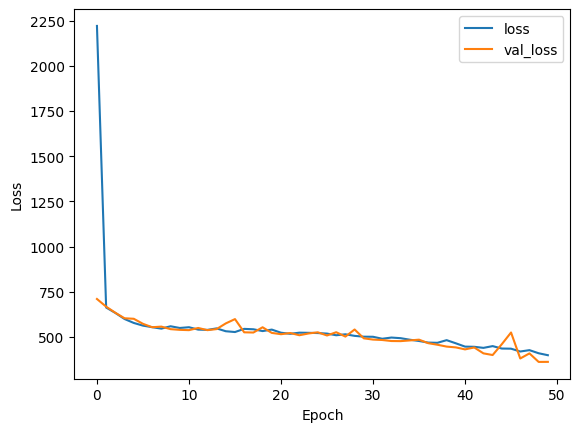

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


age  cigs_per_day   chol  male  female  smoker_yes  smoker_no  \
0  40.0           0.0  193.0   0.0     1.0         1.0        0.0   
1  59.0           0.0  236.0   0.0     1.0         1.0        0.0   
2  64.0           0.0  232.0   1.0     0.0         1.0        0.0   
3  48.0          20.0  202.0   1.0     0.0         0.0        1.0   
4  51.0           6.0  190.0   1.0     0.0         0.0        1.0   

  blood_pressure  systolic_pred  diastolic_pred  
0         110/72     116.350739       73.190544  
1         130/80     132.215851       84.169693  
2         130/80     135.500610       86.258331  
3         130/80     126.133369       79.980232  
4         130/80     123.819199       78.314133

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Load the test and train datasets
train_data_path = 'pproject_train.csv'
test_data_path = 'pproject_test.csv'

train_df = pd.read_csv(train_data_path) 
test_df = pd.read_csv(test_data_path)
# Remove rows from the train dataset where the blood_pressure column is missing
cleaned_train_df = train_df.dropna(subset=['blood_pressure']).copy()

# Function to split blood pressure into systolic and diastolic
def split_blood_pressure(bp):
    systolic, diastolic = bp.split('/')
    return float(systolic), float(diastolic)

# Apply the split function to the cleaned training dataset
cleaned_train_df[['systolic', 'diastolic']] = cleaned_train_df['blood_pressure'].apply(lambda bp: pd.Series(split_blood_pressure(bp)))

# Drop the original blood_pressure column
cleaned_train_df = cleaned_train_df.drop(columns=['blood_pressure'])
# Drop rows with any remaining NaN values in the feature columns
cleaned_train_df = cleaned_train_df.dropna()
# Prepare the feature matrix and target vectors
X = cleaned_train_df.iloc[:, 0:7].values
y = cleaned_train_df[['systolic', 'diastolic']].values

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# prompt: show the train and the test data

print("Train data:")
print(X_train)
print(y_train)

print("Test data:")
print(X_val)
print(y_val)

# Define the neural network model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(7,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(2)  # Output layer for systolic and diastolic
])
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

# Plot training history
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Prepare the feature matrix for the test data
X_test = test_df.iloc[:, 0:7].values

# Predict the blood pressure values
predictions = model.predict(X_test)

# Combine predictions with the test data
test_df['systolic_pred'] = predictions[:, 0]
test_df['diastolic_pred'] = predictions[:, 1]

# Display the first few rows of the test dataset with predictions
test_df.head()


# predictions


In [13]:

import numpy as np

# Assuming sensitivity and epsilon
sensitivity = 1  # You might need to adjust this based on your data
epsilon = 0.05      # 10.0
b = sensitivity / epsilon

# Function to add Laplace noise
def add_laplace_noise(data, scale):
    noise = np.random.laplace(0, scale, data.shape)
    return data + noise


# Add Laplace noise to predictions
noisy_predictions = add_laplace_noise(predictions, b)

# Combine noisy predictions with the test data
test_df['systolic_pred_noisy'] = noisy_predictions[:, 0]
test_df['diastolic_pred_noisy'] = noisy_predictions[:, 1]

# Display the first few rows of the test dataset with noisy predictions
test_df.head()


age  cigs_per_day   chol  male  female  smoker_yes  smoker_no  \
0  40.0           0.0  193.0   0.0     1.0         1.0        0.0   
1  59.0           0.0  236.0   0.0     1.0         1.0        0.0   
2  64.0           0.0  232.0   1.0     0.0         1.0        0.0   
3  48.0          20.0  202.0   1.0     0.0         0.0        1.0   
4  51.0           6.0  190.0   1.0     0.0         0.0        1.0   

  blood_pressure  systolic_pred  diastolic_pred  systolic_pred_noisy  \
0         110/72     116.350739       73.190544           128.264717   
1         130/80     132.215851       84.169693           116.941398   
2         130/80     135.500610       86.258331           148.743080   
3         130/80     126.133369       79.980232           109.043823   
4         130/80     123.819199       78.314133           155.168473   

   diastolic_pred_noisy  
0             87.298991  
1             71.884068  
2            115.490847  
3             78.645590  
4             63.511824

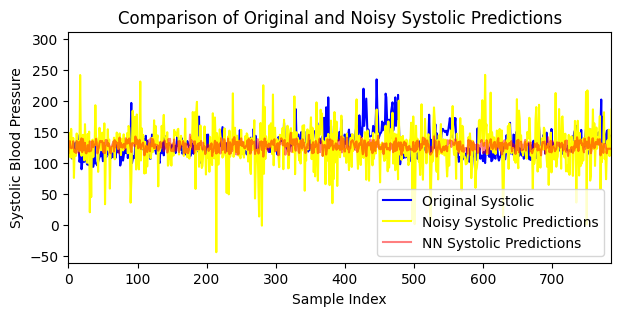

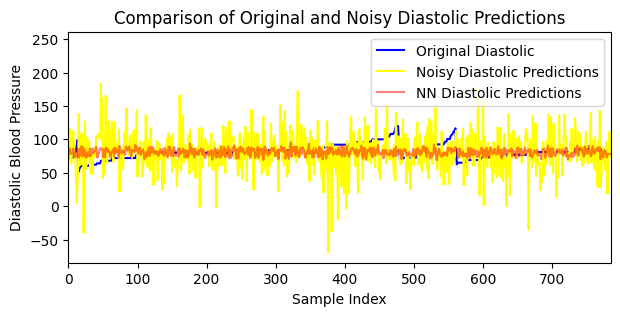

In [14]:
import matplotlib.pyplot as plt

# Example predictions before adding noise (assume `original_predictions` is available)
# This should have been saved before adding noise

plt.figure(figsize=(7, 3))
plt.plot(cleaned_train_df['systolic'], label='Original Systolic', color='blue')
plt.plot(test_df['systolic_pred_noisy'], label='Noisy Systolic Predictions', color='yellow')
plt.plot(test_df['systolic_pred'], label='NN Systolic Predictions', color='red', alpha=0.5)
plt.title('Comparison of Original and Noisy Systolic Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Systolic Blood Pressure')
plt.legend()
plt.xlim(0, 785)
plt.show()

plt.figure(figsize=(7, 3))
plt.plot(cleaned_train_df['diastolic'], label='Original Diastolic', color='blue')
plt.plot(test_df['diastolic_pred_noisy'], label='Noisy Diastolic Predictions', color='yellow')
plt.plot(test_df['diastolic_pred'], label='NN Diastolic Predictions', color='red', alpha=0.5)
plt.title('Comparison of Original and Noisy Diastolic Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Diastolic Blood Pressure')
plt.legend()
plt.xlim(0, 785)
plt.show()

In [15]:
test_df

age  cigs_per_day   chol  male  female  smoker_yes  smoker_no  \
0     40.0           0.0  193.0   0.0     1.0         1.0        0.0   
1     59.0           0.0  236.0   0.0     1.0         1.0        0.0   
2     64.0           0.0  232.0   1.0     0.0         1.0        0.0   
3     48.0          20.0  202.0   1.0     0.0         0.0        1.0   
4     51.0           6.0  190.0   1.0     0.0         0.0        1.0   
...    ...           ...    ...   ...     ...         ...        ...   
1388  48.0           0.0  233.0   1.0     0.0         0.0        1.0   
1389  48.0           0.0  233.0   1.0     0.0         0.0        1.0   
1390  48.0           0.0  233.0   1.0     0.0         0.0        1.0   
1391  48.0           0.0  233.0   1.0     0.0         0.0        1.0   
1392  48.0           0.0  233.0   1.0     0.0         0.0        1.0   

     blood_pressure  systolic_pred  diastolic_pred  systolic_pred_noisy  \
0            110/72     116.350739       73.190544           128.264717   
1            130/80     132.215851       84.169693           116.941398   
2            130/80     135.500610       86.258331           148.743080   
3            130/80     126.133369       79.980232           109.043823   
4            130/80     123.819199       78.314133           155.168473   
...             ...            ...             ...                  ...   
1388         150/94     123.088341       77.920731            83.837425   
1389       103.5/60     123.088341       77.920731           145.393776   
1390         130/94     123.088341       77.920731           137.120484   
1391         122/67     123.088341       77.920731           113.252479   
1392         130/89     123.088341       77.920731           164.307660   

      diastolic_pred_noisy  
0                87.298991  
1                71.884068  
2               115.490847  
3                78.645590  
4                63.511824  
...                    ...  
1388            134.724848  
1389             89.029136  
1390             56.095724  
1391             30.781647  
1392             71.920277  

[1393 rows x 12 columns]

# Reconstruction Attack:
 This attack aims to reconstruct the original input data from the model’s predictions. If the original data can be closely reconstructed, it indicates potential privacy leakage. The purpose is to see how much information about the original data can be inferred from the predictions.

In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# will use the test_df from above
test_data = test_df

systolic_pred_noisy = test_data['systolic_pred_noisy']
diastolic_pred_noisy = test_data['diastolic_pred_noisy']
systolic_pred = test_data['systolic_pred']
diastolic_pred = test_data['diastolic_pred']
original_bp = test_data['blood_pressure']



# will Split original blood pressure into systolic and diastolic
original_systolic = original_bp.apply(lambda bp: float(bp.split('/')[0]))
original_diastolic = original_bp.apply(lambda bp: float(bp.split('/')[1]))

# for comparing orginal values
test_data['systolic_original']=original_systolic
test_data['diastolic_original']=original_diastolic



 
test_data

age  cigs_per_day   chol  male  female  smoker_yes  smoker_no  \
0     40.0           0.0  193.0   0.0     1.0         1.0        0.0   
1     59.0           0.0  236.0   0.0     1.0         1.0        0.0   
2     64.0           0.0  232.0   1.0     0.0         1.0        0.0   
3     48.0          20.0  202.0   1.0     0.0         0.0        1.0   
4     51.0           6.0  190.0   1.0     0.0         0.0        1.0   
...    ...           ...    ...   ...     ...         ...        ...   
1388  48.0           0.0  233.0   1.0     0.0         0.0        1.0   
1389  48.0           0.0  233.0   1.0     0.0         0.0        1.0   
1390  48.0           0.0  233.0   1.0     0.0         0.0        1.0   
1391  48.0           0.0  233.0   1.0     0.0         0.0        1.0   
1392  48.0           0.0  233.0   1.0     0.0         0.0        1.0   

     blood_pressure  systolic_pred  diastolic_pred  systolic_pred_noisy  \
0            110/72     116.350739       73.190544           128.264717   
1            130/80     132.215851       84.169693           116.941398   
2            130/80     135.500610       86.258331           148.743080   
3            130/80     126.133369       79.980232           109.043823   
4            130/80     123.819199       78.314133           155.168473   
...             ...            ...             ...                  ...   
1388         150/94     123.088341       77.920731            83.837425   
1389       103.5/60     123.088341       77.920731           145.393776   
1390         130/94     123.088341       77.920731           137.120484   
1391         122/67     123.088341       77.920731           113.252479   
1392         130/89     123.088341       77.920731           164.307660   

      diastolic_pred_noisy  systolic_original  diastolic_original  
0                87.298991              110.0                72.0  
1                71.884068              130.0                80.0  
2               115.490847              130.0                80.0  
3                78.645590              130.0                80.0  
4                63.511824              130.0                80.0  
...                    ...                ...                 ...  
1388            134.724848              150.0                94.0  
1389             89.029136              103.5                60.0  
1390             56.095724              130.0                94.0  
1391             30.781647              122.0                67.0  
1392             71.920277              130.0                89.0  

[1393 rows x 14 columns]

Processing for epsilon_value: 0.05  ...


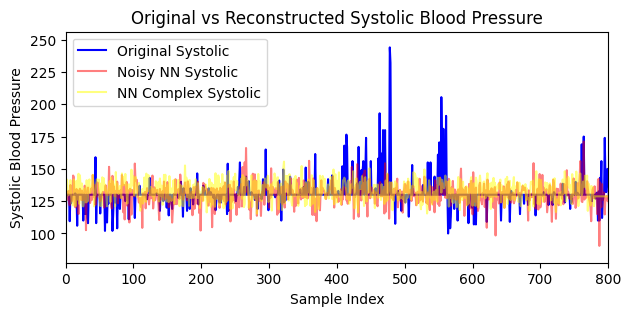

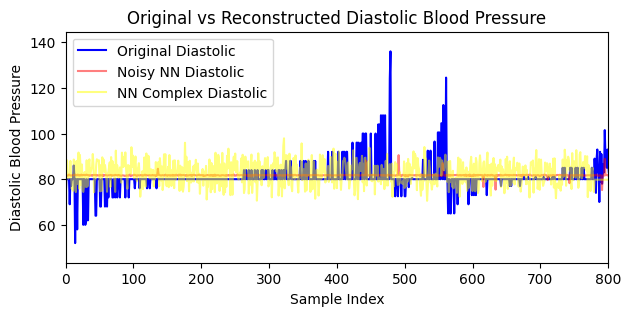

Processing...


Epsilon  NN (Systolic) Reconstruction Error  \
0     0.05                          309.346707   

   Noisy (Systolic) Reconstruction Error  NN (Diastolic) Reconstruction Error  \
0                              332.30157                           103.394126   

   Noisy (Diastolic) Reconstruction Error  
0                                84.92964

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Function to add noise to predictions
def add_noise(predictions, epsilon):
    noise = np.random.laplace(0, 1/epsilon, size=predictions.shape)
    return predictions + noise

# Define the neural network model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Function to train and evaluate the neural network model
def train_and_evaluate_nn(predictions, original_data, epochs=1000, learning_rate=0.001):
    model = SimpleNN()
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    predictions_tensor = torch.tensor(predictions, dtype=torch.float32).reshape(-1, 1)
    original_data_tensor = torch.tensor(original_data, dtype=torch.float32).reshape(-1, 1)

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(predictions_tensor)
        loss = criterion(outputs, original_data_tensor)
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        reconstructed_data = model(predictions_tensor).numpy()

    return reconstructed_data, mean_squared_error(original_data, reconstructed_data)


def plot_NN(NN_systolic_noisy,NN_systolic,NN_diastolic_noisy,NN_diastolic):
    # Plotting the original vs inverted systolic values
    plt.figure(figsize=(7, 3))
    plt.plot(original_systolic.values, label='Original Systolic', color='blue')
    plt.plot(NN_systolic_noisy, label='Noisy NN Systolic', color='red', alpha=0.5)
    plt.plot(NN_systolic, label='NN Complex Systolic', color='yellow', alpha=0.5)

    plt.title('Original vs Reconstructed Systolic Blood Pressure')
    plt.xlabel('Sample Index')
    plt.ylabel('Systolic Blood Pressure')
    plt.legend()
    plt.xlim(0, 800)
    plt.show()

    # Plotting the original vs inverted diastolic values
    plt.figure(figsize=(7, 3))
    plt.plot(original_diastolic.values, label='Original Diastolic', color='blue')
    plt.plot(NN_diastolic_noisy, label='Noisy NN Diastolic', color='red', alpha=0.5)
    plt.plot(NN_diastolic, label='NN Complex Diastolic', color='yellow', alpha=0.5)
    plt.title('Original vs Reconstructed Diastolic Blood Pressure')
    plt.xlabel('Sample Index')
    plt.ylabel('Diastolic Blood Pressure')
    plt.xlim(0, 800)
    plt.legend()
    plt.show()

# List of epsilon values to test
epsilon_values = [0.05]

# Initialize lists to store reconstruction errors and inverted values
reconstruction_errors_systolic_nn = []
reconstruction_errors_diastolic_nn = []
reconstruction_errors_systolic_nn_complex = []
reconstruction_errors_diastolic_nn_complex = []
NN_systolic= None
NN_diastolic = None
NN_systolic_noisy = None
NN_diastolic_noisy = None

# Iterate over epsilon values
for epsilon in epsilon_values:
    print("Processing for epsilon_value:", epsilon, " ...")
    # Add noise to predictions
    systolic_pred_noisy = add_noise(systolic_pred.to_numpy(), epsilon)
    diastolic_pred_noisy = add_noise(diastolic_pred.to_numpy(), epsilon)

    # More complex model (neural network) for nn systolic predictions
    NN_systolic, reconstruction_error_systolic_nn = train_and_evaluate_nn(systolic_pred, original_systolic.to_numpy())
    reconstruction_errors_systolic_nn.append(reconstruction_error_systolic_nn)

    # More complex model (neural network) for nn diastolic predictions
    NN_diastolic, reconstruction_error_diastolic_nn = train_and_evaluate_nn(diastolic_pred, original_diastolic.to_numpy())
    reconstruction_errors_diastolic_nn.append(reconstruction_error_diastolic_nn)

    # More complex model (neural network) for noisy systolic predictions
    NN_systolic_noisy, reconstruction_error_systolic_nn_complex = train_and_evaluate_nn(systolic_pred_noisy, original_systolic.to_numpy())
    reconstruction_errors_systolic_nn_complex.append(reconstruction_error_systolic_nn_complex)

    # More complex model (neural network) for noisy diastolic predictions
    NN_diastolic_noisy, reconstruction_error_diastolic_nn_complex = train_and_evaluate_nn(diastolic_pred_noisy, original_diastolic.to_numpy())
    reconstruction_errors_diastolic_nn_complex.append(reconstruction_error_diastolic_nn_complex)
    
    plot_NN(NN_systolic_noisy,NN_systolic,NN_diastolic_noisy,NN_diastolic)

# Create a DataFrame to display results
results_df = pd.DataFrame({
    'Epsilon': epsilon_values,
    'NN (Systolic) Reconstruction Error': reconstruction_errors_systolic_nn,
    'Noisy (Systolic) Reconstruction Error': reconstruction_errors_systolic_nn_complex,
    'NN (Diastolic) Reconstruction Error': reconstruction_errors_diastolic_nn,
    'Noisy (Diastolic) Reconstruction Error': reconstruction_errors_diastolic_nn_complex
})

print("Processing...")  # Indicate that processing is ongoing
results_df

In [18]:
#High Reconstruction Error:Indicates that the added Laplace noise successfully obscures the original values,
# making it difficult for an attacker to reconstruct the original blood pressure values accurately. 


## Inversion Attack:
 This attack attempts to infer sensitive features of the input data based on the model's predictions. The goal is to determine if an adversary can reverse-engineer the input features from the predictions.

Processing for epsilon_value: 0.05  ...


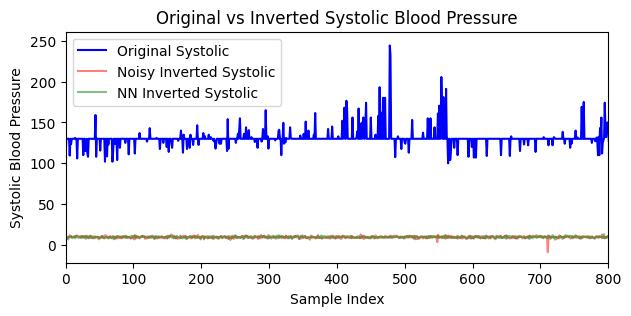

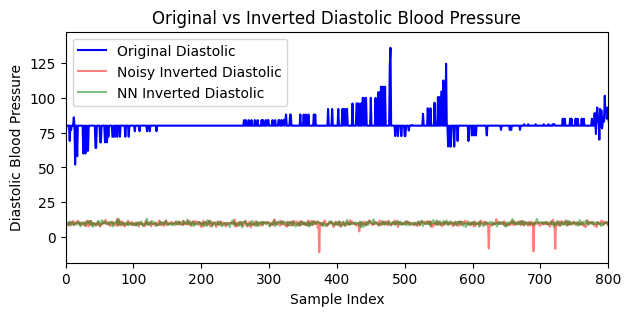

Epsilon  NN (Systolic) Inversion Error  Noisy (Systolic) Inversion Error  \
0     0.05                   15100.155273                      15112.794922   

   NN (Diastolic) Inversion Error  Noisy (Diastolic) Inversion Error  
0                     5265.223633                        5300.155273

In [19]:
import torch
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to add Laplace noise to PyTorch tensor predictions
def add_noise(predictions, epsilon):
    noise = torch.tensor(np.random.laplace(0, 1/epsilon, size=predictions.shape), dtype=torch.float32)
    return predictions + noise

# Model Inversion Attack function
def invert_model(predictions_with_noise, learning_rate=0.01, epochs=1000):
    inverted_data = torch.randn_like(predictions_with_noise, requires_grad=True)
    optimizer = optim.Adam([inverted_data], lr=learning_rate)

    for epoch in range(epochs):
        optimizer.zero_grad()
        loss = torch.mean((inverted_data - predictions_with_noise) ** 2)
        loss.backward()
        optimizer.step()
    
    return inverted_data.detach().numpy()

# Plotting the original vs inverted systolic and diastolic values
def plot_inverted(inverted_systolic_noisy, inverted_systolic_nn, inverted_diastolic_noisy, inverted_diastolic_nn):
    plt.figure(figsize=(7, 3))
    plt.plot(original_systolic.values, label='Original Systolic', color='blue')
    plt.plot(inverted_systolic_noisy, label='Noisy Inverted Systolic', color='red', alpha=0.5)
    plt.plot(inverted_systolic_nn, label='NN Inverted Systolic', color='green', alpha=0.5)
    plt.title('Original vs Inverted Systolic Blood Pressure')
    plt.xlabel('Sample Index')
    plt.ylabel('Systolic Blood Pressure')
    plt.legend()
    plt.xlim(0, 800)
    plt.show()

    plt.figure(figsize=(7, 3))
    plt.plot(original_diastolic.values, label='Original Diastolic', color='blue')
    plt.plot(inverted_diastolic_noisy, label='Noisy Inverted Diastolic', color='red', alpha=0.5)
    plt.plot(inverted_diastolic_nn, label='NN Inverted Diastolic', color='green', alpha=0.5)
    plt.title('Original vs Inverted Diastolic Blood Pressure')
    plt.xlabel('Sample Index')
    plt.ylabel('Diastolic Blood Pressure')
    plt.legend()
    plt.xlim(0, 800)
    plt.show()

# Convert data to PyTorch tensors
original_systolic_tensor = torch.tensor(original_systolic.values, dtype=torch.float32)
original_diastolic_tensor = torch.tensor(original_diastolic.values, dtype=torch.float32)
systolic_pred_tensor = torch.tensor(systolic_pred.values, dtype=torch.float32)
diastolic_pred_tensor = torch.tensor(diastolic_pred.values, dtype=torch.float32)

# List of epsilon values to test
epsilon_values = [0.05]

# Results storage lists
inversion_errors_noisy = []
inversion_errors_nn = []

# Iterate over epsilon values
for epsilon in epsilon_values:
    print("Processing for epsilon_value:", epsilon, " ...")
    # Add noise to predictions
    systolic_pred_tensor_noisy = add_noise(systolic_pred_tensor, epsilon)
    diastolic_pred_tensor_noisy = add_noise(diastolic_pred_tensor, epsilon)
    
    # Apply inversion attack on noisy predictions
    inverted_systolic_noisy = invert_model(systolic_pred_tensor_noisy)
    inverted_diastolic_noisy = invert_model(diastolic_pred_tensor_noisy)
    
    # Evaluate inversion errors
    inversion_error_systolic_noisy = np.mean((inverted_systolic_noisy - original_systolic_tensor.numpy())**2)
    inversion_error_diastolic_noisy = np.mean((inverted_diastolic_noisy - original_diastolic_tensor.numpy())**2)
    
    # Store inversion errors
    inversion_errors_noisy.append((inversion_error_systolic_noisy, inversion_error_diastolic_noisy))
    
    # Apply inversion attack on NN predictions
    inverted_systolic_nn = invert_model(systolic_pred_tensor, learning_rate=0.01, epochs=1000)
    inverted_diastolic_nn = invert_model(diastolic_pred_tensor, learning_rate=0.01, epochs=1000)
    
    # Evaluate inversion errors for NN predictions
    inversion_error_systolic_nn = np.mean((inverted_systolic_nn - original_systolic_tensor.numpy())**2)
    inversion_error_diastolic_nn = np.mean((inverted_diastolic_nn - original_diastolic_tensor.numpy())**2)
    
    # Store inversion errors for NN predictions
    inversion_errors_nn.append((inversion_error_systolic_nn, inversion_error_diastolic_nn))
    
    # Plot the results
    plot_inverted(inverted_systolic_noisy, inverted_systolic_nn, inverted_diastolic_noisy, inverted_diastolic_nn)

# Create a DataFrame to display results
results_df = pd.DataFrame({
    'Epsilon': epsilon_values,
    'NN (Systolic) Inversion Error': [error[0] for error in inversion_errors_nn],
    'Noisy (Systolic) Inversion Error': [error[0] for error in inversion_errors_noisy],
    'NN (Diastolic) Inversion Error': [error[1] for error in inversion_errors_nn],
    'Noisy (Diastolic) Inversion Error': [error[1] for error in inversion_errors_noisy]
})

results_df
